<a href="https://colab.research.google.com/github/kyungmin0101/medical_ai/blob/main/240221/medicalAI_final_youjin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


              X             Y
0     1475.0000  7.976000e-07
1     1475.0198  9.544000e-07
2     1475.0397  5.796000e-07
3     1475.0595  1.106000e-06
4     1475.0794  6.473000e-07
...         ...           ...
6296  1599.9206  6.443000e-07
6297  1599.9405  8.647000e-07
6298  1599.9603  9.092000e-07
6299  1599.9802  7.652000e-07
6300  1600.0000  6.929000e-07

[6301 rows x 2 columns]


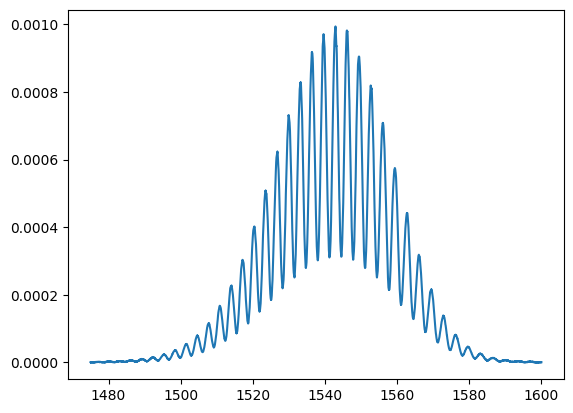

In [ ]:
import pandas as pd
import csv
import os

file_path = '/content/drive/MyDrive/1stSeries_07.05.21/1.3/W0000.CSV'

f = open(file_path, 'rt')
reader = csv.reader(f)
csv_content = [raw for raw in reader]
f.close()
df = pd.DataFrame(csv_content)[24:].reset_index(drop=True)
df = df.astype(float)
df.columns = ['X', 'Y']
print(df)

import matplotlib.pyplot as plt
plt.plot(df['X'], df['Y'])


# **Signal Smoothing - Gaussian**


In [ ]:
import pandas as pd
import csv
from scipy.ndimage import gaussian_filter
import os

base_directory1 = '/content/drive/MyDrive/Refractive_Index_Measurements_New/1stSeries_07.05.21'

all_csv_X1 = []
all_csv_Y1 = []

for root, dirs, files in os.walk(base_directory1):
    for file in files:
        if file.endswith('.CSV') and file != 'REF.CSV':
            file_path = os.path.join(root, file)

            with open(file_path, 'rt') as f:
                reader = csv.reader(f)
                csv_content = [raw for raw in reader]
            f.close()
            df = pd.DataFrame(csv_content)[24:].reset_index(drop=True)
            df = df.astype(float)
            df.columns = ['X', 'Y']
            Y = float(os.path.basename(root))
            all_csv_X1.append(df)
            all_csv_Y1.append(Y)

base_directory2 = '/content/drive/MyDrive/Refractive_Index_Measurements_New/2ndSeries_21.05.21'

all_csv_X2 = []
all_csv_Y2 = []

for root, dirs, files in os.walk(base_directory2):
    for file in files:
        if file.endswith('.CSV') and file != 'REF.CSV':
            file_path = os.path.join(root, file)

            with open(file_path, 'rt') as f:
                reader = csv.reader(f)
                csv_content = [raw for raw in reader]
            f.close()
            df = pd.DataFrame(csv_content)[24:].reset_index(drop=True)
            df = df.astype(float)
            df.columns = ['X', 'Y']
            Y = float(os.path.basename(root))
            all_csv_X2.append(df)
            all_csv_Y2.append(Y)

# **classification - 5 label**

In [103]:
Y = pd.DataFrame(all_csv_Y1, columns=['Y'])
df_Y = pd.DataFrame(all_csv_Y1, columns=['Y'])
len(Y)

for i in range(len(df_Y['Y'])):
    if df_Y['Y'][i] < 1.30:
        df_Y['Y'][i] = 'Normal_tissue'
    elif df_Y['Y'][i] >= 1.30 and df_Y['Y'][i] <=1.32:
      df_Y['Y'][i] = 'CIN_1'
    elif df_Y['Y'][i] >= 1.33 and df_Y['Y'][i] <1.38:
      df_Y['Y'][i] = 'CIN_2'
    elif df_Y['Y'][i] >= 1.38 and df_Y['Y'][i] <=1.39:
      df_Y['Y'][i] = 'CIN_3'
    else:
      df_Y['Y'][i] = 'Cervical_Cancer'

print(df_Y)

                   Y
0              CIN_1
1              CIN_1
2              CIN_1
3              CIN_1
4              CIN_1
..               ...
226  Cervical_Cancer
227  Cervical_Cancer
228  Cervical_Cancer
229  Cervical_Cancer
230  Cervical_Cancer

[231 rows x 1 columns]


# **features Calculation**

In [104]:
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.signal import find_peaks

analysis_values = []
for df, label in zip(all_csv_X1, all_csv_Y1):
    smoothed_signal = gaussian_filter(df['Y'], sigma=40)
    peaks, _ = find_peaks(smoothed_signal)

    peak_values = df['Y'][peaks].reset_index(drop=True)
    peak_times = df['X'][peaks].reset_index(drop=True)

    time_diff = np.diff(peak_times)
    std_signal_peak = np.std(time_diff)
    mean_signal_peak = np.mean(time_diff)

    analysis_values.append([std_signal_peak, mean_signal_peak])

data = pd.DataFrame(analysis_values, columns=['std', 'mean'])

spectrum_data = pd.concat([data, df_Y], axis=1)
print(spectrum_data)

          std      mean                Y
0    0.149360  3.232519            CIN_1
1    0.150904  3.229835            CIN_1
2    0.143360  3.230373            CIN_1
3    0.146847  3.229300            CIN_1
4    0.147209  3.229300            CIN_1
..        ...       ...              ...
226  0.056895  2.973859  Cervical_Cancer
227  0.054118  2.979688  Cervical_Cancer
228  0.055064  2.975024  Cervical_Cancer
229  0.055808  2.979694  Cervical_Cancer
230  0.054665  2.971524  Cervical_Cancer

[231 rows x 3 columns]


# **Test Dataset**

In [105]:
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.signal import find_peaks

test_Y = pd.DataFrame(all_csv_Y2, columns=['Y'])
df_Y_test = pd.DataFrame(all_csv_Y2, columns=['Y'])

for i in range(len(df_Y_test['Y'])):
    if df_Y_test['Y'][i] < 1.30:
        df_Y_test['Y'][i] = 'Normal_tissue'
    elif df_Y_test['Y'][i] >= 1.30 and df_Y_test['Y'][i] <=1.32:
      df_Y_test['Y'][i] = 'CIN_1'
    elif df_Y_test['Y'][i] >= 1.33 and df_Y_test['Y'][i] <1.38:
      df_Y_test['Y'][i] = 'CIN_2'
    elif df_Y_test['Y'][i] >= 1.38 and df_Y_test['Y'][i] <=1.39:
      df_Y_test['Y'][i] = 'CIN_3'
    else:
      df_Y_test['Y'][i] = 'Cervical_Cancer'

analysis_values2 = []
for df, label in zip(all_csv_X2, all_csv_Y2):
    smoothed_signal = gaussian_filter(df['Y'], sigma=40)
    peaks, _ = find_peaks(smoothed_signal)

    peak_values = df['Y'][peaks].reset_index(drop=True)
    peak_times = df['X'][peaks].reset_index(drop=True)

    time_diff = np.diff(peak_times)
    std_signal_peak = np.std(time_diff)
    mean_signal_peak = np.mean(time_diff)

    analysis_values2.append([std_signal_peak, mean_signal_peak])

data = pd.DataFrame(analysis_values2, columns=['std','mean'])

spectrum_test = pd.concat([data, df_Y_test], axis=1)
print(spectrum_test)

          std      mean                Y
0    0.158012  3.175647            CIN_1
1    0.143858  3.172516            CIN_1
2    0.145312  3.170426            CIN_1
3    0.143976  3.174082            CIN_1
4    0.164553  3.178258            CIN_1
..        ...       ...              ...
226  0.045806  2.718267  Cervical_Cancer
227  0.044999  2.714950  Cervical_Cancer
228  0.066097  2.689914  Cervical_Cancer
229  0.065139  2.692743  Cervical_Cancer
230  0.069293  2.692743  Cervical_Cancer

[231 rows x 3 columns]


# **Train and Test Dataset shape**

In [106]:
from sklearn.model_selection import train_test_split

train, test= train_test_split(spectrum_test, test_size = 0.4, random_state=1, shuffle=True)

X_train1 = spectrum_data[['mean','std']]
y_train1= spectrum_data['Y']

X_train2 = train[['mean','std']]
y_train2= train['Y']

X_train = pd.concat([X_train1, X_train2], axis=0)
y_train = pd.concat([y_train1, y_train2], axis=0)

X_test = test[['mean','std']]
y_test = test['Y']

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(369, 2)
(369,)
(93, 2)
(93,)


# **Training Model**

In [107]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import time


knn = KNeighborsClassifier(n_neighbors=5, leaf_size = 20)
rf = RandomForestClassifier(n_estimators=20)
svm= SVC(kernel='rbf', C=0.6)
dt = DecisionTreeClassifier(random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(20,), activation='relu', solver='adam', max_iter=5000)


start_knn = time.time()
knn.fit(X_train, y_train)
end_knn = time.time()

start_dt = time.time()
dt.fit(X_train, y_train)
end_dt = time.time()

start_rf = time.time()
rf.fit(X_train, y_train)
end_rf = time.time()

start_svm = time.time()
svm.fit(X_train, y_train)
end_svm = time.time()

start_mlp = time.time()
mlp.fit(X_train, y_train)
end_mlp = time.time()



start_knn2 = time.time()
y_knn = knn.predict(X_test)
end_knn2 = time.time()

start_dt2 = time.time()
y_dt = dt.predict(X_test)
end_dt2 = time.time()

start_rf2 = time.time()
y_rf = rf.predict(X_test)
end_rf2 = time.time()

start_svm2 = time.time()
y_svm = svm.predict(X_test)
end_svm2 = time.time()

start_mlp2 = time.time()
y_mlp = mlp.predict(X_test)
end_mlp2 = time.time()

print('knn training time: ', end_knn-start_knn)
print('svm training time: ', end_svm-start_svm)
print('rf training time: ', end_rf-start_rf)
print('dt training time: ', end_dt-start_dt)
print('mlp training time: ', end_mlp-start_mlp)

print('\nknn testing time: ', end_knn2-start_knn2)
print('svm testing time: ', end_svm2-start_svm2)
print('rf testing time: ', end_rf2-start_rf2)
print('dt testing time: ', end_dt2-start_dt2)
print('mlp testing time: ', end_mlp2-start_mlp2)

knn training time:  0.00566554069519043
svm training time:  0.007384777069091797
rf training time:  0.03357815742492676
dt training time:  0.0027501583099365234
mlp training time:  2.2355289459228516

knn testing time:  0.007459163665771484
svm testing time:  0.0023796558380126953
rf testing time:  0.0026574134826660156
dt testing time:  0.0014255046844482422
mlp testing time:  0.001201629638671875


**KNN**

knn_Accuracy: 0.967741935483871
                 precision    recall  f1-score   support

          CIN_1       1.00      1.00      1.00         7
          CIN_2       1.00      0.89      0.94        18
          CIN_3       0.83      0.91      0.87        11
Cervical_Cancer       0.98      1.00      0.99        57

       accuracy                           0.97        93
      macro avg       0.95      0.95      0.95        93
   weighted avg       0.97      0.97      0.97        93



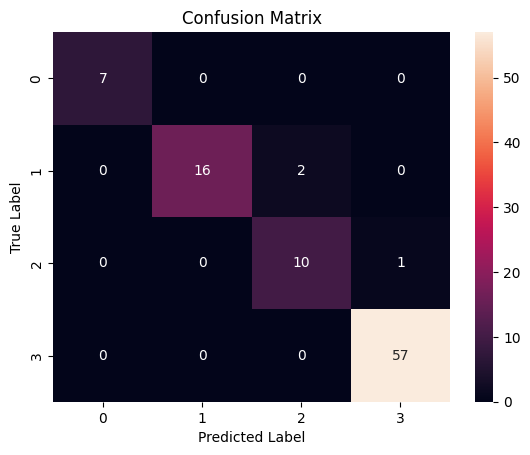

In [108]:
from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(y_test, y_knn)
print(f"knn_Accuracy: {accuracy_knn}")

cm_knn = confusion_matrix(y_test, y_knn)
sns.heatmap(cm_knn, annot=True, fmt="d", cbar=True)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

report = classification_report(y_test, y_knn)

print(report)

# Display the plot
plt.show()

decision tree

rf_Accuracy: 0.9354838709677419
                 precision    recall  f1-score   support

          CIN_1       0.88      1.00      0.93         7
          CIN_2       0.89      0.89      0.89        18
          CIN_3       1.00      0.64      0.78        11
Cervical_Cancer       0.95      1.00      0.97        57

       accuracy                           0.94        93
      macro avg       0.93      0.88      0.89        93
   weighted avg       0.94      0.94      0.93        93



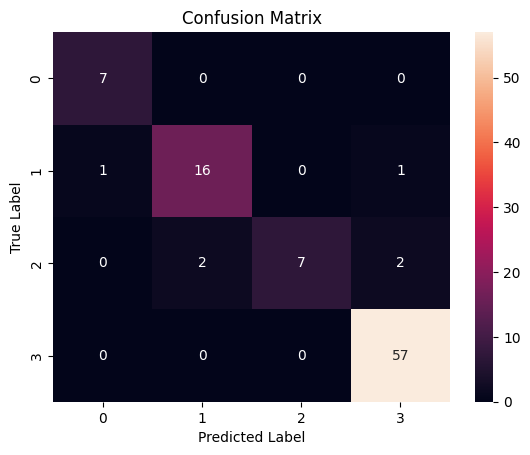

In [109]:
accuracy_dt = accuracy_score(y_test, y_dt)
print(f"rf_Accuracy: {accuracy_dt}")

cm_dt = confusion_matrix(y_test, y_dt)
sns.heatmap(cm_dt, annot=True, fmt="d",cbar=True)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

report = classification_report(y_test, y_dt)

print(report)

# Display the plot
plt.show()

**Random Forest**

rf_Accuracy: 0.9139784946236559
                 precision    recall  f1-score   support

          CIN_1       1.00      1.00      1.00         7
          CIN_2       1.00      0.94      0.97        18
          CIN_3       1.00      0.36      0.53        11
Cervical_Cancer       0.88      1.00      0.93        57

       accuracy                           0.91        93
      macro avg       0.97      0.83      0.86        93
   weighted avg       0.92      0.91      0.90        93



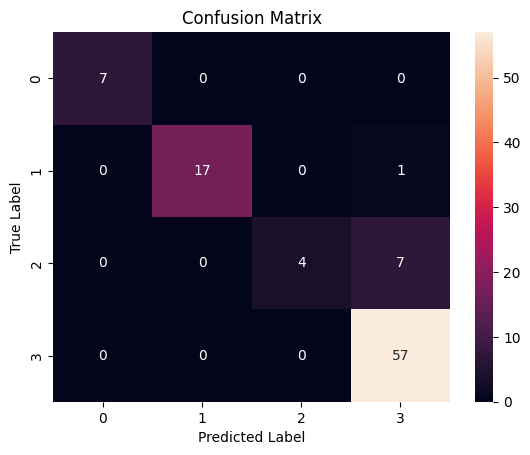

In [110]:
from sklearn.metrics import accuracy_score
accuracy_rf = accuracy_score(y_test, y_rf)
print(f"rf_Accuracy: {accuracy_rf}")

cm_rf = confusion_matrix(y_test, y_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cbar=True)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

report = classification_report(y_test, y_rf)

print(report)

# Display the plot
plt.show()

**SVM**

svm_Accuracy: 0.6774193548387096


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

          CIN_1       0.00      0.00      0.00         7
          CIN_2       0.46      0.33      0.39        18
          CIN_3       0.00      0.00      0.00        11
Cervical_Cancer       0.71      1.00      0.83        57

       accuracy                           0.68        93
      macro avg       0.29      0.33      0.30        93
   weighted avg       0.53      0.68      0.58        93



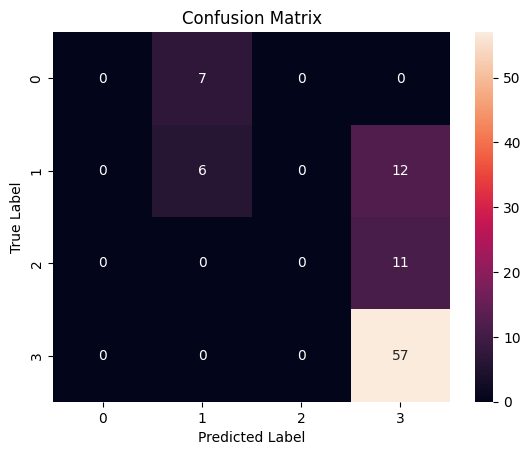

In [111]:
from sklearn.metrics import accuracy_score
accuracy_svm = accuracy_score(y_test, y_svm)
print(f"svm_Accuracy: {accuracy_svm}")

cm_svm = confusion_matrix(y_test, y_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", cbar=True)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

report = classification_report(y_test, y_svm)

print(report)

# Display the plot
plt.show()

**MLP**

mlp_Accuracy: 0.8279569892473119
                 precision    recall  f1-score   support

          CIN_1       1.00      0.86      0.92         7
          CIN_2       0.93      0.78      0.85        18
          CIN_3       0.00      0.00      0.00        11
Cervical_Cancer       0.79      1.00      0.88        57

       accuracy                           0.83        93
      macro avg       0.68      0.66      0.66        93
   weighted avg       0.74      0.83      0.78        93



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


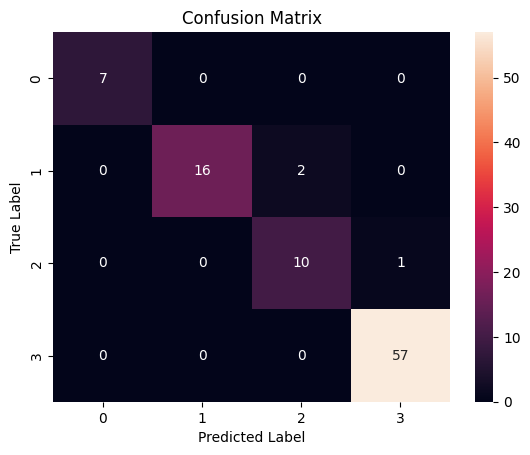

In [112]:
from sklearn.metrics import accuracy_score
accuracy_mlp = accuracy_score(y_test, y_mlp)
print(f"mlp_Accuracy: {accuracy_mlp}")

cm_mlp = confusion_matrix(y_test, y_knn)
sns.heatmap(cm_mlp, annot=True, fmt="d", cbar=True)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

report = classification_report(y_test, y_mlp)

print(report)

# Display the plot
plt.show()

# **Ensemble**

training time:  4.838555335998535
testing time:  0.06499075889587402
ensemble_Accuracy: 0.9032258064516129
                 precision    recall  f1-score   support

          CIN_1       1.00      1.00      1.00         7
          CIN_2       1.00      0.89      0.94        18
          CIN_3       1.00      0.36      0.53        11
Cervical_Cancer       0.86      1.00      0.93        57

       accuracy                           0.90        93
      macro avg       0.97      0.81      0.85        93
   weighted avg       0.92      0.90      0.89        93



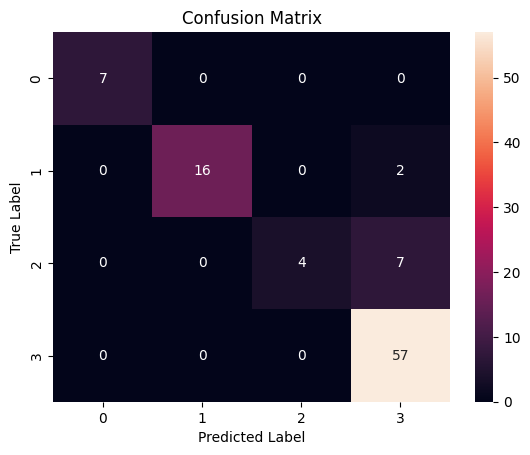

In [113]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
ensemble_model = VotingClassifier(estimators=[('mlp', mlp),('knn', knn), ('rf', rf), ('svc', svm)], voting= 'hard')

start_time = time.time()
ensemble_model.fit(X_train, y_train)
end_time = time.time()
print('training time: ', end_time-start_time)

start_time = time.time()
y_pred = ensemble_model.predict(X_test)
end_time = time.time()
print('testing time: ', end_time-start_time)

accuracy_ensemble = accuracy_score(y_test, y_pred)
print(f"ensemble_Accuracy: {accuracy_ensemble}")

cm_ensemble = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_ensemble, annot=True, fmt="d", cbar=True)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

report = classification_report(y_test, y_pred)

print(report)

# Display the plot
plt.show()

# **Hyperparameter navigation**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

grid_params = {
    'n_neighbors' : list(range(1,20)),
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}
grid = GridSearchCV(knn, grid_params, refit=True, cv=5, verbose=3)
grid.fit(X_train, y_train)
y_pred = grid.best_estimator_.predict(X_test)


In [115]:
print("Best Parameters : ", grid.best_params_)
print("Best Score : ", grid.best_score_)
print("Best Test Score : ", grid.score(X_test, y_test))

Best Parameters :  {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
Best Score :  0.8188448722695298
Best Test Score :  0.989247311827957


# **Cross validation and Final model result**

*** Cross val score *** 
   [0.89189189 0.64864865 0.67567568 0.90540541 0.97260274]

*** Mean Accuracy *** 
   0.8188449
ensemble_Accuracy: 0.989247311827957
                 precision    recall  f1-score   support

          CIN_1       1.00      1.00      1.00         7
          CIN_2       1.00      0.94      0.97        18
          CIN_3       1.00      1.00      1.00        11
Cervical_Cancer       0.98      1.00      0.99        57

       accuracy                           0.99        93
      macro avg       1.00      0.99      0.99        93
   weighted avg       0.99      0.99      0.99        93



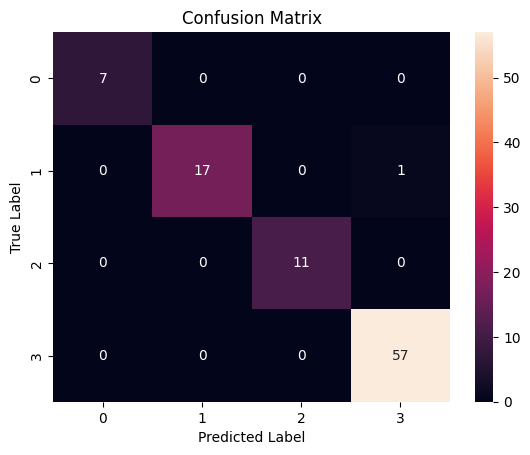

In [117]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *

def print_metrics(model, X_train):
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print('*** Cross val score *** \n   {}'.format(scores))
    print('\n*** Mean Accuracy *** \n   {:.7f}'.format(scores.mean()))


model = grid.best_estimator_
model.fit(X_train, y_train)
print_metrics(model, X_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"ensemble_Accuracy: {accuracy}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cbar=True)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

report = classification_report(y_test, y_pred)

print(report)

# Display the plot
plt.show()
